In [28]:
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import ShuffleSplit

In [2]:
digits=datasets.load_digits()

In [3]:
len(digits.data[0]) #8*8사이즈 이미지이기 때문에

64

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
knn=KNeighborsClassifier()

In [6]:
knn.get_params() #파라미터 뽑아오기

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [7]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [8]:
param_grid={'n_neighbors': range(1,20)}

In [9]:
param_grid

{'n_neighbors': range(1, 20)}

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
grid_model=GridSearchCV(knn,return_train_score=True, param_grid=param_grid, cv=10, verbose=3)# 셔플도 해보기 나머지 파라미터들도 써보기

In [12]:
grid_model.fit(digits.data,digits.target) 

Fitting 10 folds for each of 19 candidates, totalling 190 fits
[CV 1/10] END n_neighbors=1;, score=(train=1.000, test=0.933) total time=   0.0s
[CV 2/10] END n_neighbors=1;, score=(train=1.000, test=0.994) total time=   0.0s
[CV 3/10] END n_neighbors=1;, score=(train=1.000, test=0.972) total time=   0.0s
[CV 4/10] END n_neighbors=1;, score=(train=1.000, test=0.972) total time=   0.0s
[CV 5/10] END n_neighbors=1;, score=(train=1.000, test=0.967) total time=   0.0s
[CV 6/10] END n_neighbors=1;, score=(train=1.000, test=0.983) total time=   0.0s
[CV 7/10] END n_neighbors=1;, score=(train=1.000, test=0.994) total time=   0.0s
[CV 8/10] END n_neighbors=1;, score=(train=1.000, test=0.989) total time=   0.0s
[CV 9/10] END n_neighbors=1;, score=(train=1.000, test=0.978) total time=   0.0s
[CV 10/10] END n_neighbors=1;, score=(train=1.000, test=0.966) total time=   0.0s
[CV 1/10] END n_neighbors=2;, score=(train=0.993, test=0.939) total time=   0.0s
[CV 2/10] END n_neighbors=2;, score=(train=0.

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, return_train_score=True,
             verbose=3)

In [13]:
grid_model.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [14]:
colnames=['param_n_neighbors','mean_train_score','mean_test_score']

In [15]:
grid_df=pd.DataFrame(grid_model.cv_results_, columns=colnames)

In [16]:
grid_df.set_index('param_n_neighbors',inplace=True)

In [17]:
grid_df.sort_values(['mean_test_score','mean_train_score'], ascending=False)

,mean_train_score,mean_test_score
param_n_neighbors,,
3,0.993322,0.976633
1,1.000000,0.974963
2,0.990973,0.974407
4,0.991776,0.972182
5,0.990540,0.971074
6,0.989427,0.968290
7,0.990107,0.967734
8,0.988685,0.964944
9,0.987881,0.964944


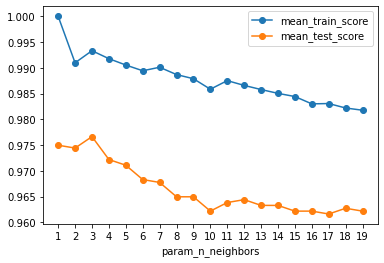

In [24]:
ax=grid_df.plot.line(marker='o')
ax.set_xticks(grid_df.index)

In [25]:
grid_model.best_estimator_ # 모델의 파라미터 값

KNeighborsClassifier(n_neighbors=3)

In [26]:
grid_model.best_score_ #가장 좋은 값

0.9766325263811299

In [27]:
grid_model.best_params_

{'n_neighbors': 3}

In [29]:
# 혼자 해보는 시간

In [36]:
#셔플 넣어보기

In [31]:
ss=ShuffleSplit(test_size=0.2,n_splits=20)

In [32]:
grid_model00=GridSearchCV(knn,return_train_score=True, param_grid=param_grid, cv=ss, verbose=3)

In [33]:
grid_model00

GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=None, test_size=0.2, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, return_train_score=True,
             verbose=3)

In [34]:
grid_model00.fit(digits.data,digits.target) 

Fitting 20 folds for each of 19 candidates, totalling 380 fits
[CV 1/20] END n_neighbors=1;, score=(train=1.000, test=0.989) total time=   0.0s
[CV 2/20] END n_neighbors=1;, score=(train=1.000, test=0.994) total time=   0.0s
[CV 3/20] END n_neighbors=1;, score=(train=1.000, test=0.986) total time=   0.0s
[CV 4/20] END n_neighbors=1;, score=(train=1.000, test=0.997) total time=   0.0s
[CV 5/20] END n_neighbors=1;, score=(train=1.000, test=0.981) total time=   0.0s
[CV 6/20] END n_neighbors=1;, score=(train=1.000, test=0.981) total time=   0.0s
[CV 7/20] END n_neighbors=1;, score=(train=1.000, test=0.992) total time=   0.0s
[CV 8/20] END n_neighbors=1;, score=(train=1.000, test=0.978) total time=   0.0s
[CV 9/20] END n_neighbors=1;, score=(train=1.000, test=0.989) total time=   0.0s
[CV 10/20] END n_neighbors=1;, score=(train=1.000, test=0.981) total time=   0.0s
[CV 11/20] END n_neighbors=1;, score=(train=1.000, test=0.994) total time=   0.0s
[CV 12/20] END n_neighbors=1;, score=(train=

GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=None, test_size=0.2, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, return_train_score=True,
             verbose=3)

In [35]:
grid_model00.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [38]:
grid_model00.best_score_

0.9880555555555557

In [40]:
#DecisionTreeClassifier 사용해 보기

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
treemodel=DecisionTreeClassifier()

In [44]:
treemodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [55]:
param_tree={'criterion':['gini','entropy'],'max_depth':range(1,11)}

In [60]:
grid_tree=GridSearchCV(treemodel,return_train_score=True, param_grid=param_tree, cv=ss, verbose=1)

In [61]:
grid_tree.fit(digits.data,digits.target)

Fitting 20 folds for each of 20 candidates, totalling 400 fits


GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=None, test_size=0.2, train_size=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11)},
             return_train_score=True, verbose=1)

In [62]:
grid_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [63]:
grid_tree.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [64]:
grid_tree.best_score_

0.8597222222222222

------

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
treemodel=DecisionTreeClassifier()

In [3]:
treemodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [5]:
param_tree={'criterion':['gini','entropy'],'max_depth':range(1,11)}

In [4]:
ss=ShuffleSplit(test_size=0.25,n_splits=20)

In [6]:
grid_model=GridSearchCV(treemodel,return_train_score=True, param_grid=param_tree, cv=ss, verbose=1)

In [65]:
from sklearn.model_selection import cross_val_score

In [82]:
grid_knn=GridSearchCV(knn,param_grid=param_grid,cv=2)
grid_knn

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)})

In [83]:
outer_scores=cross_val_score(grid_knn,digits.data,digits.target,cv=5)
outer_scores

array([0.96111111, 0.95277778, 0.96657382, 0.98607242, 0.96657382])

In [69]:
grid_knn.fit(digits.data,digits.target)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)})

In [75]:
grid_knn.best_score_

0.9610455566813907

In [80]:
preferred_params=grid_knn.best_estimator_.get_params() #가장 베스트인 모델의 파라미터 확인 해서 변수로 저장
grid_knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [81]:
final_knn=KNeighborsClassifier(**preferred_params) # 베스트의 파라미터를 넣어주기

In [77]:
final_knn.fit(digits.data,digits.target)

KNeighborsClassifier(n_neighbors=1)

In [78]:
final_knn.score(digits.data,digits.target)

1.0